# Przetwarzanie Grafiki i Muzyki - laboratorium nr 5

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Zadanie 1 (2 punkty)

Wygeneruj sygnał w kształcie funkcji sinus. Następnie dodaj do niego szumy:

  * Gaussowski: $N\left(0,0.5^2\right)$
  * Jednostajny: $U\left(-0.5,0.5\right)$
  * Sól i pieprz
  
Oraz wykonaj na nich filtry:

  * Średniej ruchomej
  * Medianowy

Wygeneruj 3 zestawy rysunków - na każdym z nich przedstaw wykres sinusa, sinusa z dodanym szumem oraz zaaplikowanymi filtracjami. Napisz, które filtry radzą sobie dobrze z podanymi typami zakłóceń. Dodaj legendę.

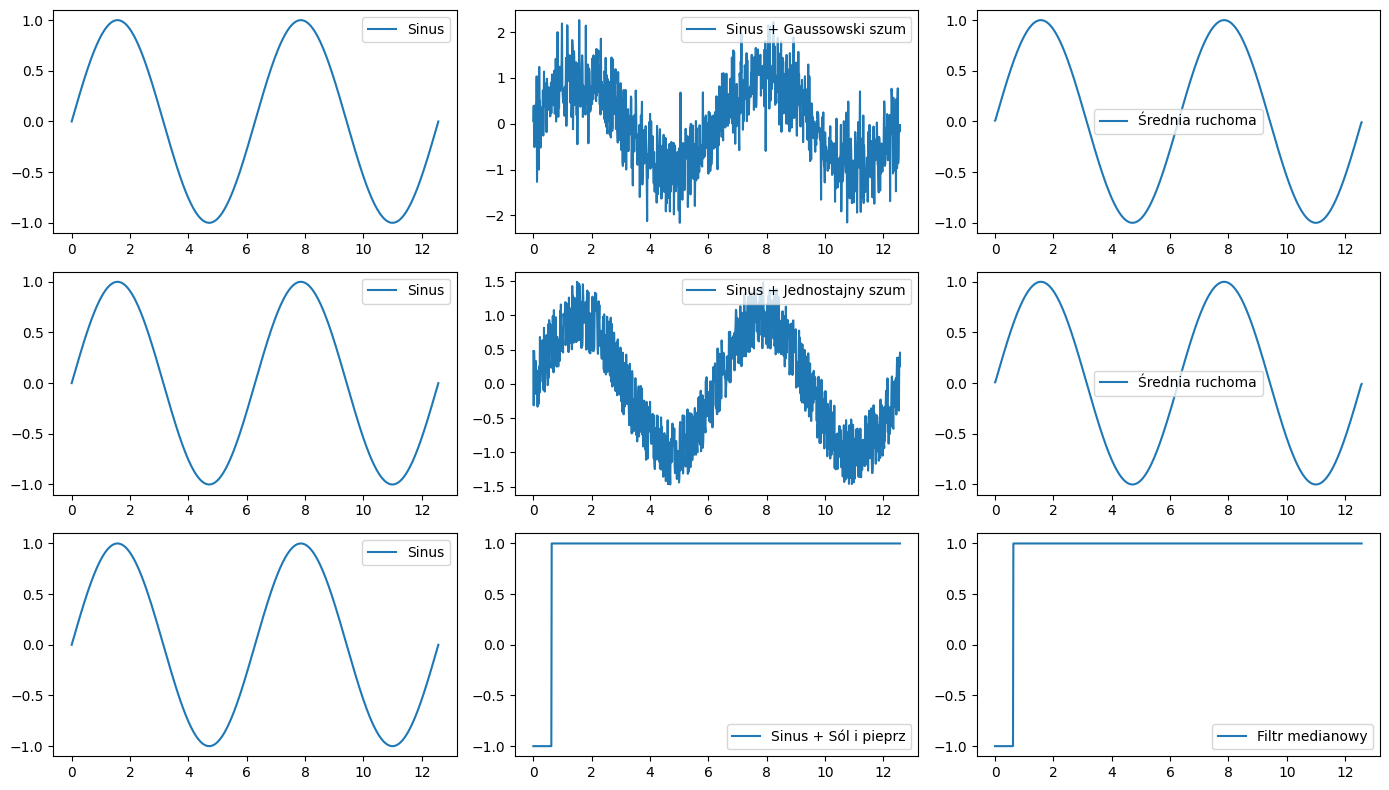

In [18]:
# image = np.zeros((600, 800, 3), dtype=np.uint8)
# amplitude = 100
# frequency = 1/50.0
# phase = 0
# 
# # Generuj przykładowy sygnał sinusoidalny
# for x in range(800):
#     y = int(600/2 + amplitude * np.sin(2*np.pi*frequency*x + phase))
#     cv2.circle(image, (x, y), 1, (255, 255, 255), -1)
# 
# 
# # x = np.linspace(0, 10, 1000)
# # sin = np.sin(x)
# # print(sin)
# cv2.imshow("sin", image)
# 
# cv2.waitKey(50)
# cv2.destroyAllWindows()

x = np.linspace(0, 4*np.pi, 1000)
sinus = np.sin(x)
gaussian_noise = np.random.normal(0, 0.5, sinus.shape)
uniform_noise = np.random.uniform(-0.5, 0.5, sinus.shape)
salt_pepper_noise = np.copy(sinus)
salt_pepper_noise[:50] = -1  # Sol - ustawienie wartości na -1
salt_pepper_noise[50:] = 1  # Pieprz - ustawienie wartości na 1

# plt.plot(y, y_gaussian, y_linear, y_salt_pepper)
plt.plot(sinus)
plt.plot(gaussian_noisessian)
plt.plot(y_linear)
plt.plot(y_salt_pepper)
plt.legend()
plt.show()


## Zadanie 2 (2 punkty)

Napisz funkcję realizującą dodawanie do obrazka zakłócenia o rozkładzie jednostajnym na odcinku $U\left(-\alpha, \alpha\right)$ w taki sposób, by liczba wylosowana z tego rozkładu była dodatkowo mnożona przez prawdopodobieństwo wystąpienia tego zjawiska (a właściwie przez maskę 0-1). Proszę przetestować funkcję na obrazie LENA_512 w wersji kolorowej i w odcieniach szarości.

In [9]:
def add_uniform_noise(image, alpha: float):
    new_image = np.copy(image)
    mask = np.random.uniform(-alpha, alpha, new_image.shape)
    probabilities = np.random.choice([0, 1], new_image.shape)
    noise = mask * probabilities
    new_image = np.clip(new_image.astype(np.float64) + noise, 0, 255).astype(np.uint8)
    return new_image


lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_COLOR)
gray_lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_GRAYSCALE)
uniform_noise_lena = add_uniform_noise(lena, alpha=40)
uniform_noise_gray_lena = add_uniform_noise(gray_lena, alpha=40)

cv2.imshow("lena", lena)
cv2.imshow("gray lena", gray_lena)
cv2.imshow("uniform noise lena", uniform_noise_lena)
cv2.imshow("uniform noise gray lena", uniform_noise_gray_lena)

cv2.waitKey(50)
cv2.destroyAllWindows()

## Zadanie 3 (2 punkty)

Napisz funkcję realizującą dodawanie do obrazka zakłócenia o rozkładzie normalnym $N\left(\mu,\sigma^2\right)$ w taki sposób, by liczba wylosowana z tego rozkładu była dodatkowo mnożona przez prawdopodobieństwo wystąpienia tego zjawiska (a właściwie przez maskę 0-1). Proszę przetestować funkcję na obrazie LENA_512 w wersji kolorowej i w odcieniach szarości.

In [10]:
def add_gaussian_noise(image, mi, square_sigma):
    new_image = np.copy(image)
    mask = np.random.normal(mi, square_sigma, new_image.shape)
    probabilities = np.random.choice([0, 1], new_image.shape)
    noise = mask * probabilities
    new_image = np.clip(new_image.astype(np.float64) + noise, 0, 255).astype(np.uint8)
    return new_image


lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_COLOR)
gray_lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_GRAYSCALE)
gaussian_noise_lena = add_gaussian_noise(lena, 0, 10)
gaussian_noise_gray_lena = add_gaussian_noise(gray_lena, 0, 10)

cv2.imshow("lena", lena)
cv2.imshow("gray lena", gray_lena)
cv2.imshow("gaussian noise lena", gaussian_noise_lena)
cv2.imshow("gaussian noise gray lena", gaussian_noise_gray_lena)

cv2.waitKey(50)
cv2.destroyAllWindows()

## Zadanie 4 (2 punkty)

Napisz funkcję realizującą dodawanie do obrazka zakłócenia typu sól i pieprz w taki sposób, by zakłócenie to było dodatkowo mnożone przez prawdopodobieństwo wystąpienia tego zjawiska (a właściwie przez maskę 0-1). Proszę przetestować funkcję na obrazie LENA_512 w wersji kolorowej i w odcieniach szarości.

In [12]:
def add_salt_pepper_noise(image):
    new_image = np.copy(image)
    mask = np.random.choice([0, 255], new_image.shape)
    probabilities = np.random.choice([0, 1], new_image.shape)
    noise = mask * probabilities
    new_image = np.clip(new_image + noise, 0, 255).astype(np.uint8)
    return new_image


lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_COLOR)
gray_lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_GRAYSCALE)
salt_pepper_noise_lena = add_salt_pepper_noise(lena)
salt_pepper_noise_gray_lena = add_salt_pepper_noise(gray_lena)

cv2.imshow("lena", lena)
cv2.imshow("gray lena", gray_lena)
cv2.imshow("salt & pepper noise lena", salt_pepper_noise_lena)
cv2.imshow("salt & pepper noise gray lena", salt_pepper_noise_gray_lena)

cv2.waitKey(50)
cv2.destroyAllWindows()

## Zadanie 5 (1 punkt)
Wykonaj filtrację, używając filtra średniej ruchomej, obrazów zaszumionych powyższymi (trzema) sposobami. Użyj filtracji na obrazie "LENA_512.jpg" w formacie RGB na każdej warstwie niezależnie. Ponadto stwierdź (ale nie na oko!), jakość filtracji.

In [22]:
# policzyc norme l2 pomeidzy obrazkiem odfiltrowanym a oryginalnym

def calculate_mean_pixel(image_color):
    new_image_color = np.copy(image_color)
    height, width = image_color.shape
    
    # sloooow :(
    for i in range(height):
        for j in range(width):
            neighbours = image_color[i - 1 : i + 1, j - 1 : j + 1]
            mean_pixel = np.sum(neighbours) / max(neighbours.size, 1)
            new_image_color[i, j] = mean_pixel
    
    return new_image_color


def mean_noise_filtration(image):
    B, G, R = cv2.split(image)

    new_B = calculate_mean_pixel(B)
    new_G = calculate_mean_pixel(G)
    new_R = calculate_mean_pixel(R)

    return np.dstack((new_B, new_G, new_R))
            

lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_COLOR)

uniform_noise_lena = add_uniform_noise(lena, alpha=70)
filtered_uniform_noise_lena = mean_noise_filtration(uniform_noise_lena)
uniform_comparison = np.concatenate((lena, uniform_noise_lena, filtered_uniform_noise_lena), axis=1)

gaussian_noise_lena = add_gaussian_noise(lena, 10, 30)
filtered_gaussian_noise_lena = mean_noise_filtration(gaussian_noise_lena)
gaussian_comparison = np.concatenate((lena, gaussian_noise_lena, filtered_gaussian_noise_lena), axis=1)

salt_pepper_noise_lena = add_salt_pepper_noise(lena)
filtered_salt_pepper_lena = mean_noise_filtration(salt_pepper_noise_lena)
salt_pepper_comparison = np.concatenate((lena, salt_pepper_noise_lena, filtered_salt_pepper_lena), axis=1)

cv2.imshow("lena / uniform / mean filtration", uniform_comparison)
cv2.imshow("lena / gaussian / mean filtration", gaussian_comparison)
cv2.imshow("lena / salt & pepper / mean filtration", salt_pepper_comparison)

print(f"Quality of mean filtration on uniform noise: {np.mean((lena - filtered_uniform_noise_lena)**2)}")
print(f"Quality of mean filtration on gaussian noise: {np.mean((lena - filtered_gaussian_noise_lena)**2)}")
print(f"Quality of mean filtration on salt&pepper noise: {np.mean((lena - filtered_salt_pepper_lena)**2)}")

cv2.waitKey(50)
cv2.destroyAllWindows()

Quality of mean filtration on uniform noise: 76.5335578918457
Quality of mean filtration on gaussian noise: 66.09287007649739
Quality of mean filtration on salt&pepper noise: 83.21930567423503


## Zadanie 6 (1 punkt)
Wykonaj filtrację, używając filtra medianowego, obrazów zaszumionych powyższymi (trzema) sposobami. Użyj filtracji na obrazie "LENA_512.jpg" w formacie RGB na każdej warstwie niezależnie. Ponadto stwierdź (ale nie na oko!), jakość filtracji.

In [23]:
def calculate_median_pixel(image_color):
    new_image_color = np.copy(image_color)
    height, width = image_color.shape
    
    # sloooow :(
    for i in range(height):
        for j in range(width):
            neighbours = image_color[i - 1 : i + 1, j - 1 : j + 1]
            median_pixel = np.median(neighbours)
            new_image_color[i, j] = median_pixel
    
    return new_image_color


def median_noise_filtration(image):
    B, G, R = cv2.split(image)

    new_B = calculate_median_pixel(B)
    new_G = calculate_median_pixel(G)
    new_R = calculate_median_pixel(R)

    return np.dstack((new_B, new_G, new_R))


lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_COLOR)

uniform_noise_lena = add_uniform_noise(lena, alpha=70)
filtered_uniform_noise_lena = median_noise_filtration(uniform_noise_lena)
uniform_comparison = np.concatenate((lena, uniform_noise_lena, filtered_uniform_noise_lena), axis=1)

gaussian_noise_lena = add_gaussian_noise(lena, 10, 30)
filtered_gaussian_noise_lena = median_noise_filtration(gaussian_noise_lena)
gaussian_comparison = np.concatenate((lena, gaussian_noise_lena, filtered_gaussian_noise_lena), axis=1)

salt_pepper_noise_lena = add_salt_pepper_noise(lena)
filtered_salt_pepper_lena = median_noise_filtration(salt_pepper_noise_lena)
salt_pepper_comparison = np.concatenate((lena, salt_pepper_noise_lena, filtered_salt_pepper_lena), axis=1)

cv2.imshow("lena / uniform / median filtration", uniform_comparison)
cv2.imshow("lena / gaussian / median filtration", gaussian_comparison)
cv2.imshow("lena / salt & pepper / median filtration", salt_pepper_comparison)

print(f"Quality of median filtration on uniform noise: {np.mean((lena - filtered_uniform_noise_lena)**2)}")
print(f"Quality of median filtration on gaussian noise: {np.mean((lena - filtered_gaussian_noise_lena)**2)}")
print(f"Quality of median filtration on salt&pepper noise: {np.mean((lena - filtered_salt_pepper_lena)**2)}")

cv2.waitKey(50)
cv2.destroyAllWindows()

/var/folders/6t/lw9p33tn1q124mgvz_z7v9gm0000gn/T/ipykernel_5353/587610224.py:10: RuntimeWarning: invalid value encountered in cast
  new_image_color[i, j] = median_pixel


Quality of median filtration on uniform noise: 54.80810419718424
Quality of median filtration on gaussian noise: 48.14230728149414
Quality of median filtration on salt&pepper noise: 45.34545771280924
